In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [11]:
PATH_IMG_ROOT = '/content/drive/MyDrive/Projekte/Solafune/Cloud_satelite/'
CMAPS = ['Blues', 'Greens', 'Reds']

In [27]:
  def plot_bands(bands, mask, titles):
    """
    Zeigt die verschiedenen Bänder als Subplots an.

    Parameters:
        bands (list of np.array): Liste der Band-Daten als 2D-NumPy-Arrays.
        titles (list of str): Liste der Titel für die Subplots.
    """
    num_bands = len(bands)
    fig, axes = plt.subplots(1, num_bands+1, figsize=(20, 5))

    for ax, band, title, c in zip(axes, bands, titles, CMAPS):
        cax = ax.imshow(band, cmap=c)
        ax.set_title(title)
        fig.colorbar(cax, ax=ax, orientation='vertical')

    # Anzeige der Maske
    cax = axes[-1].imshow(mask, vmin=0, vmax=1)
    axes[-1].set_title('Mask')
    fig.colorbar(cax, ax=axes[-1], orientation='vertical')

    plt.show()


def show_image(src):
    image = src.read([1, 2, 3])

    # Normalize for visualization
    image = image.astype('float32')
    for band in range(image.shape[0]):
        image[band] /= image[band].max()

    # Transpose the image for visualization
    image = image.transpose((1, 2, 0))

    # Show the image
    plt.imshow(image)
    plt.title('RGB Image')
    plt.axis('off')
    plt.show()



def visualize(id):
    # Öffnen der .tif-Datei
    with rasterio.open(f'{PATH_IMG_ROOT}train_true_color/train_true_color_{id}.tif') as src:
        num_bands = src.count  # Anzahl der Bänder im Bild
        bands = [src.read(i) for i in range(1, num_bands + 1)]

        show_image(src)

    # Öffnen der Maske
    with rasterio.open(f'{PATH_IMG_ROOT}train_mask/train_mask_{id}.tif') as src:
        mask = src.read(1)

    # Anzeigen der Bänder
    plot_bands(bands, mask, [f'Band {i}' for i in range(1, num_bands + 1)])

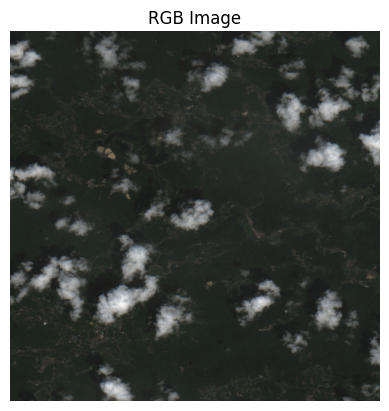

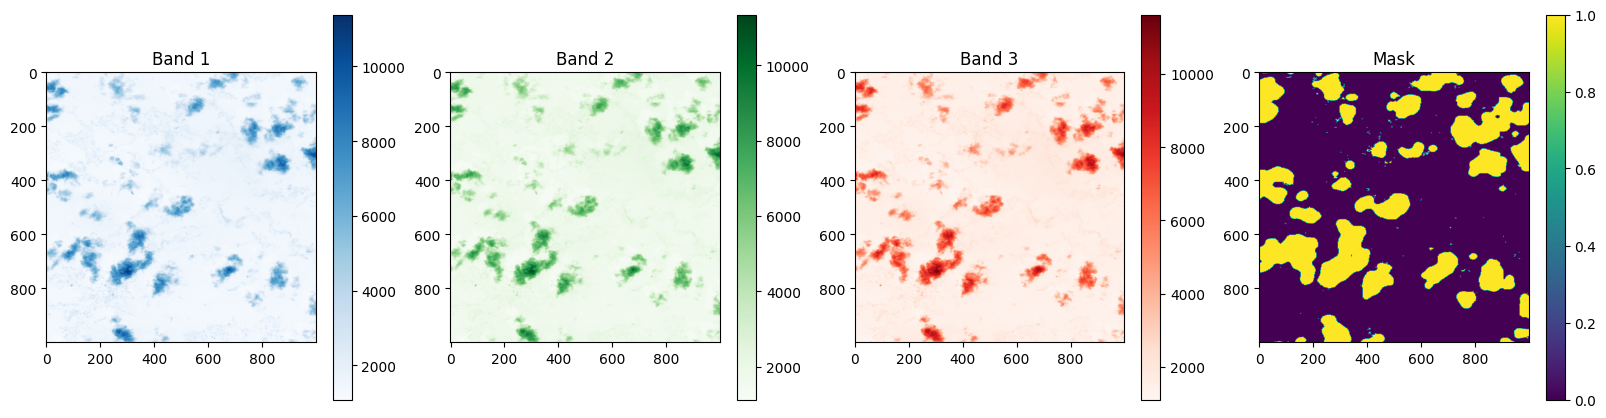

In [31]:
visualize(510)